<a href="https://colab.research.google.com/github/caramos84/Quantum/blob/main/CellularAutomaton03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

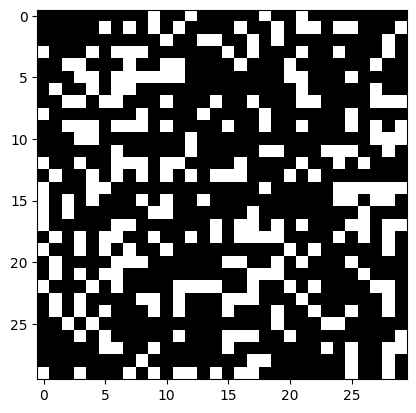

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def initialize_grid(size=20, random_fill=True):
    if random_fill:
        return np.random.choice([0, 1], size=(size, size), p=[0.7, 0.3])  # 30% de células vivas
    else:
        return np.zeros((size, size), dtype=int)

def update(grid):
    size = grid.shape[0]
    new_grid = grid.copy()

    for i in range(size):
        for j in range(size):
            # Contar vecinos vivos
            neighbors = np.sum(grid[max(0, i-1):min(size, i+2), max(0, j-1):min(size, j+2)]) - grid[i, j]

            # Aplicar reglas del juego de la vida
            if grid[i, j] == 1:
                if neighbors < 2 or neighbors > 3:
                    new_grid[i, j] = 0  # Muerte por soledad o sobrepoblación
            else:
                if neighbors == 3:
                    new_grid[i, j] = 1  # Nacimiento

    return new_grid

def animate(i, grid, img):
    new_grid = update(grid)
    img.set_data(new_grid)
    grid[:] = new_grid[:]
    return img,

def run_game_of_life(size=20, steps=50):
    grid = initialize_grid(size)

    fig, ax = plt.subplots()
    img = ax.imshow(grid, cmap='gray')
    ani = animation.FuncAnimation(fig, animate, fargs=(grid, img), frames=steps, interval=200, blit=False)
    plt.show()

# Ejecutar el juego
# Changed 'un_game_of_life' to 'run_game_of_life'
run_game_of_life(size=30, steps=100)